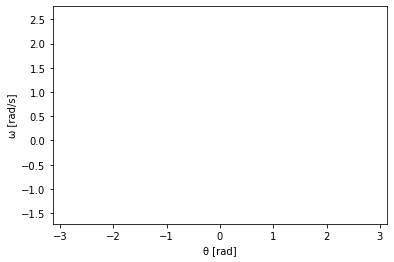

In [4]:
# This script is used to model the case of the nonlinear pendulum with 
# both damping and a driving force using the Runge-Kutta method.

import matplotlib.pyplot as plt
import numpy as np
import math

# Values are defined for the gravitational constant and length of the pendulum.
g = 1.0
L = 1.0

# Defines the damping constant, as well as the amplitude and angular frequency of the driving force.
k = 0.5
A = 1.47
phi = 0.66667

# The transient is the time after which the plot of the system begins 
# in order to observe solely the steady state motion of the system.
transient = 5000

# A function defining equation 11 in the lab document which calculates the motion of the system.
def f(theta,omega,t):
 force =  -(g/L)*math.sin(theta) - k* omega +A*math.cos(phi*t)
 return force

# Initial conditions for the system are set as well as the time increment dt.
theta = 3.1
omega = 0.0
t = 0.0
dt = 0.01

# Lists are created to store the values to be plotted.
theta_list = [theta]
omega_list = [omega]
t_list = [t]

# A shift parameter is defined for adjusting the range of theta values over which to plot.
Q = 0.0

# This loop uses the Runge-Kutta method to integrate theta and omega 
# for a number of time steps equal to the given range.
for i in range(10000):
  
  # Runge-Kutta method is applied for the current time step.
  k1a = dt * omega
  k1b = dt * f(theta, omega, t)
  k2a = dt * (omega + k1b/2)
  k2b = dt * f(theta + k1a/2, omega + k1b/2, t + dt/2)
  k3a = dt * (omega + k2b/2)
  k3b = dt * f(theta + k2a/2, omega + k2b/2, t + dt/2)
  k4a = dt * (omega + k3b)
  k4b = dt * f(theta + k3a, omega + k3b, t + dt)
  
  theta = theta + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
  omega = omega + (k1b + 2 * k2b + 2 * k3b + k4b) /6

  # If theta is outside of the desired range of values, it is shifted back within range.
  #if (theta < -np.pi+Q):
    #theta = theta + 2*np.pi
  #if (theta > np.pi+Q):
    #theta = theta - 2*np.pi

  # Update time step.
  t = t + dt

  # Append the updated values to their corresponding lists.
  theta_list.append(theta)
  omega_list.append(omega)
  t_list.append(t)
  

# The final plot is generated
plt.plot(theta_list[transient:],omega_list[transient:],',')
plt.xlabel('θ [rad]')
plt.ylabel('ω [rad/s]')
plt.xlim([-np.pi+Q,np.pi+Q])

plt.show()
